# Obtención y creación y creación de conjuntos de datos

Los datos que se utilizarán son los *Amazon Review Data (2018)*, que se puede obtener de:
* https://nijianmo.github.io/amazon/index.html

Específicamente se trabajará con el conjunto de datos de reseñas de libros de las colecciones disponibles. En el conjunto pequeño para experimentación, se obtienen un total de 27 millones de instancias aproximadamente. Como se trata de un número elevado de instancias para un conjunto de entrenamiento de prueba en un proyecto pequeño, se debe pensar en reducir el tamaño.

Como hay muchos datos, se puede crear conjuntos **balanceados*** por puntuación de reseñas. También se considerará crear 2 conjuntos completamente independientes:
* Un conjunto de 10.000 muestras balanceadas para realizar el análisis y el estudio más completo, probando diferentes clasificadores.
* Un conjunto de 1.000.000 de muestras balanceadas (diferentes de las anteriores) para entrenar el mejor modelo resultante del análisis anterior y encontrar así el mejor resultado.

De modo, que este es el propósito del código escrito a continuación:

In [1]:
import ijson
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
def substract_stats():
    input_file = open("./data/Books_5.json")
    lines = 0
    attributes_checked_counter = 1
    attributes_informed = 2
    # rating_1 = 3
    # rating_2 = 4
    # rating_3 = 5
    # rating_4 = 6
    # rating_5 = 7
    counter = np.array([0,0,0,0,0,0,0,0])
    for line in input_file:
        counter[lines]+=1

        for col in ijson.items(line, ""):
            attributes = col.keys()
            needed = ["overall","reviewText","reviewTime"]
            
            attributes_checked = True
            for item in needed:
                if not item in attributes:
                    attributes_checked = False
            
            if attributes_checked:
                counter[attributes_checked_counter]+=1

            if attributes_checked and col["overall"]!="" and col["reviewText"]!="" and col["reviewTime"]!="":
                rating = int(col["overall"])-1
                counter[attributes_informed]+=1
                counter[rating+3]+=1

    input_file.close()

    return counter

stats = substract_stats()

In [7]:
print(stats)

[27164983 27161262 27161265   826960  1007487  2380778  5906134 17039900]


Atributos no informados 3
Atributos informados 27161265
Sin atributos 3718


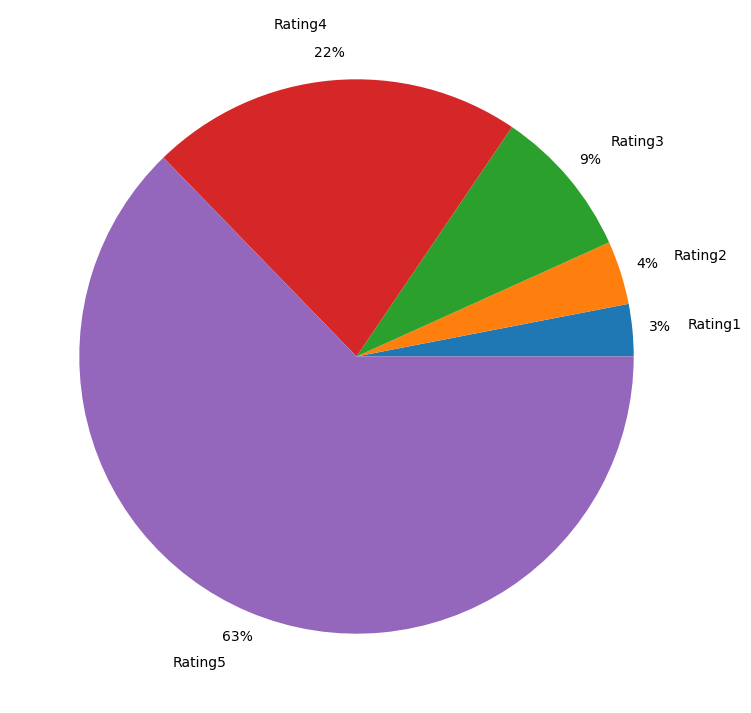

In [18]:
import matplotlib.pyplot as plt

def print_stats_graphs():
    lines = 0
    attributes_checked_counter = 1
    attributes_informed = 2
    rating_1 = 3
    rating_2 = 4
    rating_3 = 5
    rating_4 = 6
    rating_5 = 7    

    print('Atributos no informados', stats[attributes_informed]-stats[attributes_checked_counter])
    print('Atributos informados', stats[attributes_informed]) 
    print('Sin atributos', stats[lines]-stats[attributes_informed])

    labels = 'Rating1', 'Rating2', 'Rating3', 'Rating4', 'Rating5'
    sizes = [stats[rating_1],stats[rating_2],stats[rating_3],stats[rating_4],stats[rating_5]]

    fig, ax = plt.subplots()
    fig.set_size_inches(9,9)
    ax.pie(sizes, labels=labels,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

print_stats_graphs()

In [1]:
def create_balanced_ratings_file(line_from, max_instances, output_file_name):
    input_file = open("./data/Books_5.json")
    output_file = open(output_file_name, "w+")
    max_lines = 10000000
    
    ratings_processed = max_instances*np.array([0,1,1,1,0])
    counter = 0
    for line in input_file:
        if counter >= line_from:
            for col in ijson.items(line, ""):
                attributes = col.keys()
                needed = ["overall","reviewText","reviewTime"]
                
                attributes_checked = True
                for item in needed:
                    if not item in attributes:
                        attributes_checked = False
                
                if attributes_checked and col["overall"]!="" and col["reviewText"]!="" and col["reviewTime"]!="":
                    rating = int(col["overall"])-1

                    if ratings_processed[rating] < max_instances:
                        output_file.write(line)
                        ratings_processed[rating]+=1
 
        completed_ratings = []
        for rating_count in ratings_processed:
            if rating_count>=max_instances:
                completed_ratings.append(True)

        if len(completed_ratings)==5:
            break

        counter+=1
        if counter>=max_lines:
            break        
    
    input_file.close()
    output_file.close()

    return counter

20% para pruebas:

In [17]:
last_line = create_balanced_ratings_file(0, 1000, "./data/ds_testing.json")
print(last_line)

30351


El conjunto de testing:

In [18]:
another = create_balanced_ratings_file(last_line+1, 5000, "./data/ds_training.json")
print(another)

173614


Un conjunto completo que se tendrá que dividir entre testing y pruebas de 1 millón de registros:

In [19]:
create_balanced_ratings_file(0, 200000, "./data/ds_1m.json")

5602215